In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('message.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()  # last 3 columns has lots of missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 , inplace=True)

In [7]:
df = df.rename({'v1':'target', 'v2':'message'},axis=1)

In [8]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4825
spam     747
Name: target, dtype: int64


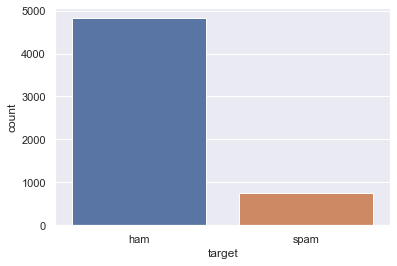

In [9]:
print(df['target'].value_counts())  # data is imbalance
sns.countplot(df['target'])
plt.show()

In [10]:
df['target'].replace({'ham':0, 'spam':1},inplace=True) # encoding

In [11]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep='first', inplace=True)

In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
import string

In [19]:
def text_cleaner(text):
    text = text.lower()                        # lower case ('HELLO' --> 'hello')
    text = nltk.word_tokenize(text)            # tokenization (['hello', 'how', 'are', 'you'])
    
    y = [] 
    for i in text:                             #removing ".,?!"
        if i.isalnum():
            y.append(i)   
    text = y.copy()
    y.clear()
                                              # removing stopwords('is,are,it) and punctuations($,%,><)
    for i in text:                              
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)                  # help to remove list[]

In [20]:
df['clean_message'] = df['message'].apply(text_cleaner)

In [21]:
df.head()

,target,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [22]:
spam_msg = []
for msg in df[df['target'] == 1]['clean_message'].tolist():
    for word in msg.split():
        spam_msg.append(word)

In [23]:
pd.DataFrame(spam_msg).value_counts()[:30] # top 30 word in spam messages

call       320
free       191
2          155
txt        141
text       122
ur         119
u          119
mobil      114
stop       104
repli      103
claim       98
4           97
prize       82
get         74
new         64
servic      64
tone        63
send        60
urgent      57
nokia       57
contact     56
award       55
phone       52
cash        51
pleas       51
week        49
win         48
collect     45
min         45
c           45
dtype: int64

In [24]:
ham_msg = []
for msg in df[df['target'] == 0]['clean_message'].tolist():
    for word in msg.split():
        ham_msg.append(word)

In [25]:
pd.DataFrame(ham_msg).value_counts()[:30] # top 30 word in ham messages

u        883
go       404
get      349
gt       288
lt       287
2        284
come     275
know     236
got      236
like     234
call     233
time     219
love     216
ok       215
good     213
want     208
ur       197
day      190
need     170
one      165
lor      159
4        156
home     152
think    149
see      147
take     143
still    143
da       142
tell     133
make     129
dtype: int64

In [26]:
df.drop('message',axis=1, inplace=True)

In [27]:
df.head()

,target,clean_message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=2000)

In [29]:
X = df.iloc[:,1]
y = df.iloc[:,0].values

In [30]:
X = tf.fit_transform(X).toarray()

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [32]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB # bernoulliNB is work well when output is 2 ('Yes','No')
                                                    # multinomialNB used probabilistic and frequency count method

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [34]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.97678916827853
[[896   0]
 [ 24 114]]


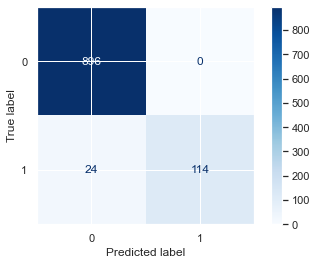

In [35]:
plot_confusion_matrix(mnb, X_test, y_test, cmap='Blues') # precision is good the model didnt find any important messages as spam

In [36]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9854932301740812
[[895   1]
 [ 14 124]]


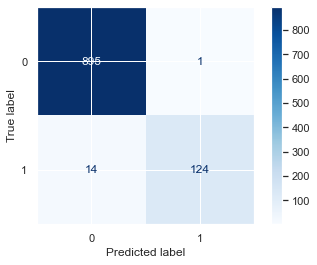

In [37]:
plot_confusion_matrix(bnb, X_test, y_test, cmap='Blues')

In [41]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [42]:
pickle.dump(text_cleaner,open('text_cleaner','wb'))